# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

Additional Hypotheses:
5- Applicants self-employed may get less approvals
6- Household families with higher size may get less approvals (more expenses)

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [25]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats

df = pd.read_csv('..\data\data.csv') 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [34]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [35]:
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



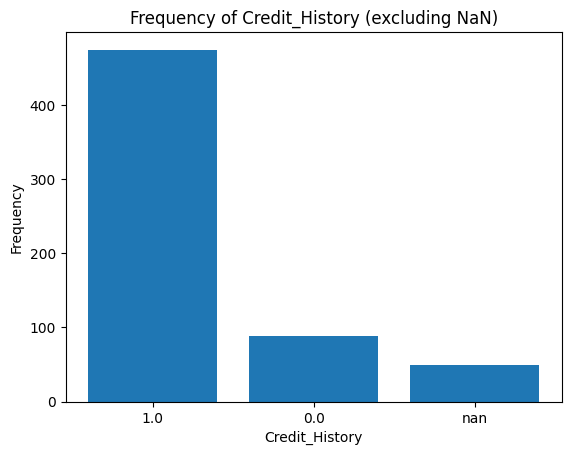

In [66]:
# calculating the number of client with credit history and their frequency
# Count the occurrences of each unique value in the "credit" column
df['Credit_History'] = df['Credit_History'].astype(str)
value_counts_credit =df['Credit_History'].value_counts()

# Plot the frequency
plt.bar(value_counts_credit.index, value_counts_credit.values)
plt.xlabel('Credit_History')
plt.ylabel('Frequency')
plt.title('Frequency of Credit_History')
plt.show()

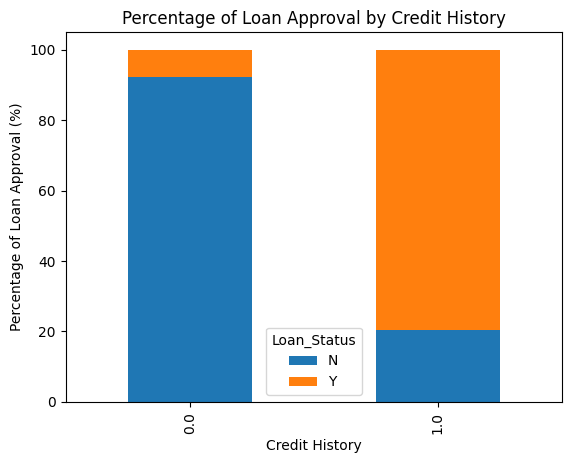

In [26]:
# Calculate the percentage of 'Yes' and 'No' loan approval by credit history
percentage = df.groupby(['Credit_History', 'Loan_Status']).size() / df.groupby('Credit_History').size() * 100
percentage = percentage.unstack()

# Plotting
percentage.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Credit History')
plt.ylabel('Percentage of Loan Approval (%)')
plt.title('Percentage of Loan Approval by Credit History')

# Show the plot
plt.show()






The data above shows that the mean > median for ApplicantIncome and CoapplicantIncome therefore both distribution are skewed to the right. Let's vizualize both distribution to get more information.

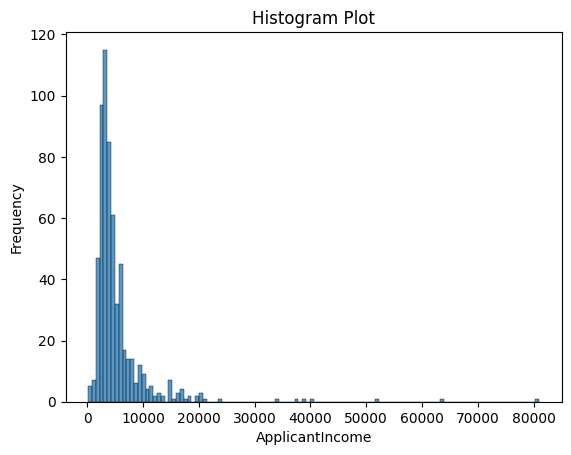

In [37]:
# Plotting the distribution of ApplicantIncome
# Create a histogram plot using seaborn
sns.histplot(df['ApplicantIncome'])

# Set the x-axis label
plt.xlabel('ApplicantIncome')

# Set the y-axis label
plt.ylabel('Frequency')

# Set the title
plt.title('Histogram Plot')

# Display the plot
plt.show()

In [38]:
# testing normality with shapiro test (h0; the distribution is normal)
from scipy import stats
stat, p = stats.shapiro(df['ApplicantIncome'])
print('%0.15f' % p)

0.000000000000000


We can see that the distribution of Applicantincome is skewed to the right with many etreme values and it is not symetric and not normal. The p-value=0 therefore we can reject the H0.  Both the test and vizualisation conform that it is not normal.

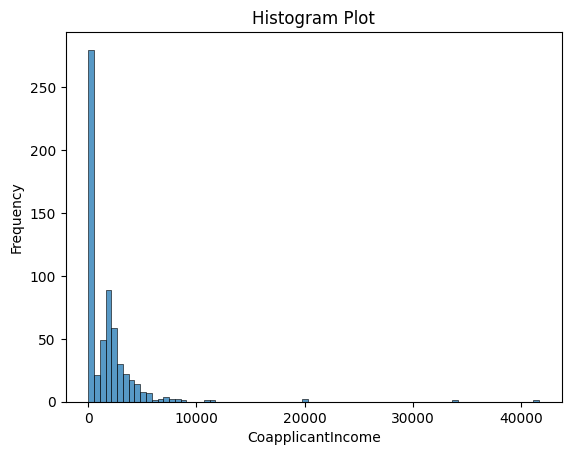

In [39]:
# Plotting the distribution of CoapplicantIncome
# Create a histogram plot using seaborn
sns.histplot(df['CoapplicantIncome'])

# Set the x-axis label
plt.xlabel('CoapplicantIncome')

# Set the y-axis label
plt.ylabel('Frequency')

# Set the title
plt.title('Histogram Plot')

# Display the plot
plt.show()

In [40]:
# testing normality with shapiro test (h0; the distribution is normal)
from scipy import stats
stat, p = stats.shapiro(df['CoapplicantIncome'])
print('%0.15f' % p)

0.000000000000000


We can see that the distribution of CoapplicantIncome is skewed to the right with many etreme values and it is not symetric and not normal. The p-value=0 therefore we can reject the H0.  Both the test and vizualisation conform that it is not normal.
Interestingly the mode for coapplicant is the first bin which suggests that it is zero or close to it.

In [41]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

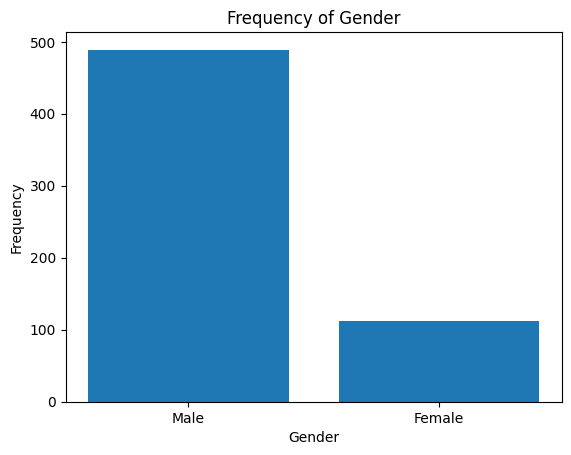

In [42]:
# Count the occurrences of each unique value in the "Gender" column
value_counts_gender =df['Gender'].value_counts()

# Plot the frequency
plt.bar(value_counts_gender.index, value_counts_gender.values)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Frequency of Gender')
plt.show()

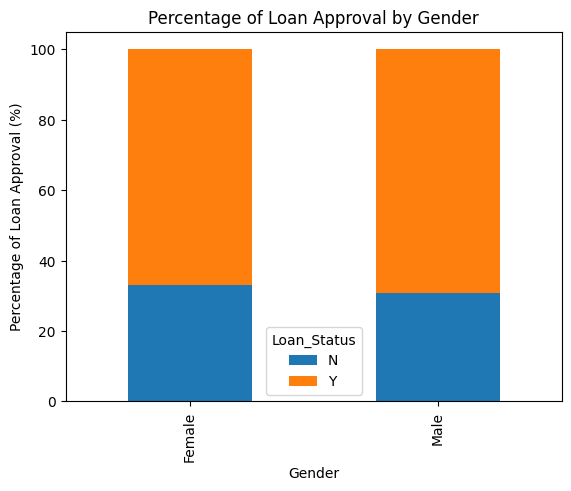

In [27]:
# Calculate the percentage of 'Yes' and 'No' loan approval by credit history
percentage = df.groupby(['Gender', 'Loan_Status']).size() / df.groupby('Gender').size() * 100
percentage = percentage.unstack()

# Plotting
percentage.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Percentage of Loan Approval (%)')
plt.title('Percentage of Loan Approval by Gender')

# Show the plot
plt.show()








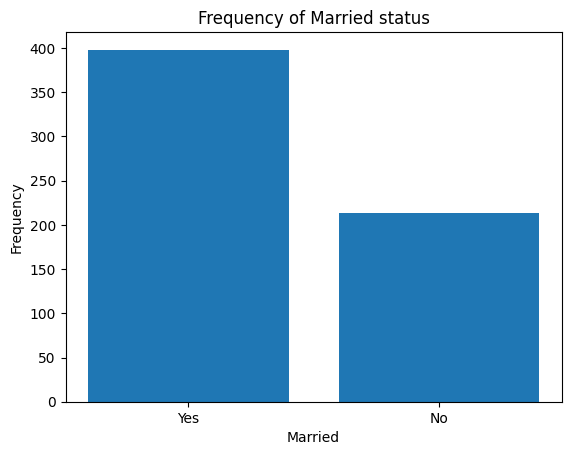

In [43]:
# Count the occurrences of each unique value in the "Married" column
value_counts_status =df['Married'].value_counts()
# Plot the frequency
plt.bar(value_counts_status.index, value_counts_status.values)
plt.xlabel('Married')
plt.ylabel('Frequency')
plt.title('Frequency of Married status')
plt.show()


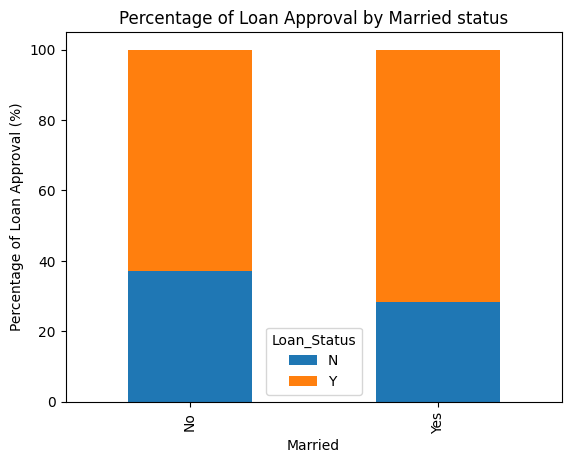

In [31]:
# Calculate the percentage of 'Yes' and 'No' loan approval by credit history
percentage = df.groupby(['Married', 'Loan_Status']).size() / df.groupby('Married').size() * 100
percentage = percentage.unstack()

# Plotting
percentage.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Married')
plt.ylabel('Percentage of Loan Approval (%)')
plt.title('Percentage of Loan Approval by Married status')

# Show the plot
plt.show()

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

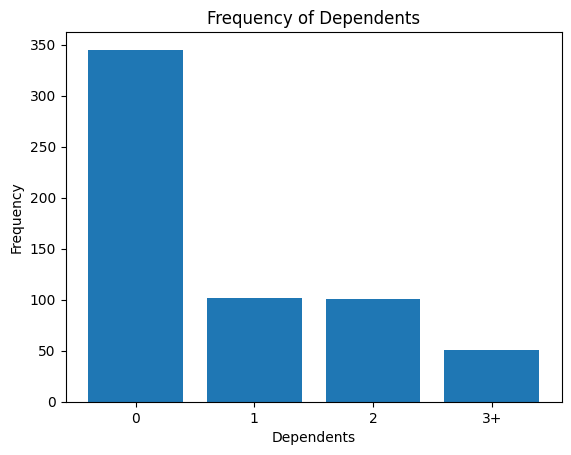

In [44]:
# Count the occurrences of each unique value in the "Dependents" column
value_counts_dependents =df['Dependents'].value_counts()
# Plot the frequency
plt.bar(value_counts_dependents.index, value_counts_dependents.values)
plt.xlabel('Dependents')
plt.ylabel('Frequency')
plt.title('Frequency of Dependents')
plt.show()


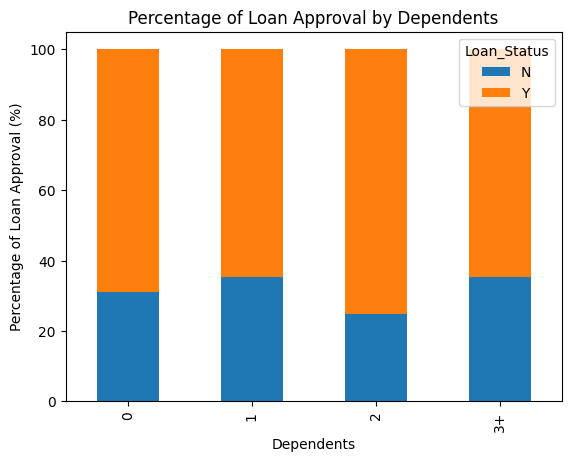

In [61]:
# Calculate the percentage of 'Yes' and 'No' loan approval by credit history
percentage = df.groupby(['Dependents', 'Loan_Status']).size() / df.groupby('Dependents').size() * 100
percentage = percentage.unstack()

# Plotting
percentage.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Dependents')
plt.ylabel('Percentage of Loan Approval (%)')
plt.title('Percentage of Loan Approval by Dependents')

# Show the plot
plt.show()

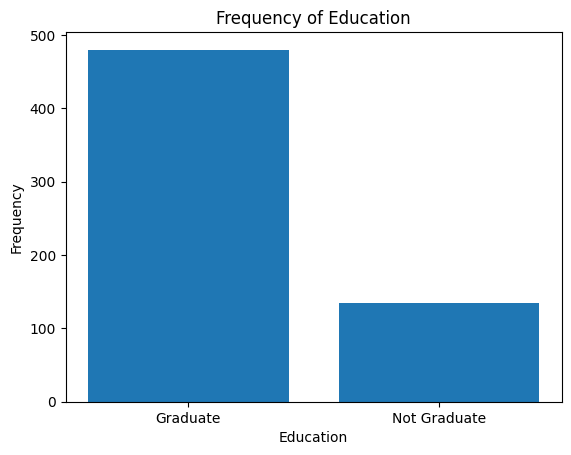

In [45]:
# Count the occurrences of each unique value in the 'Education' column
value_counts_education = df['Education'].value_counts()
# Plot the frequency
plt.bar(value_counts_education.index, value_counts_education.values)
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('Frequency of Education')
plt.show()


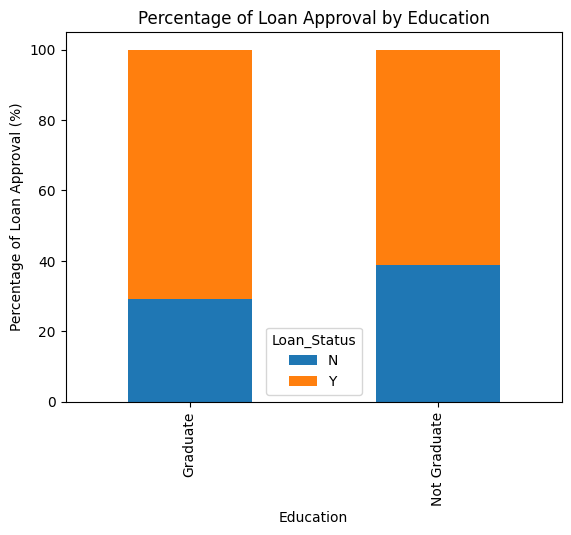

In [51]:
# Calculate the percentage of 'Yes' and 'No' loan approval by credit history
percentage = df.groupby(['Education', 'Loan_Status']).size() / df.groupby('Education').size() * 100
percentage = percentage.unstack()

# Plotting
percentage.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Education')
plt.ylabel('Percentage of Loan Approval (%)')
plt.title('Percentage of Loan Approval by Education')

# Show the plot
plt.show()

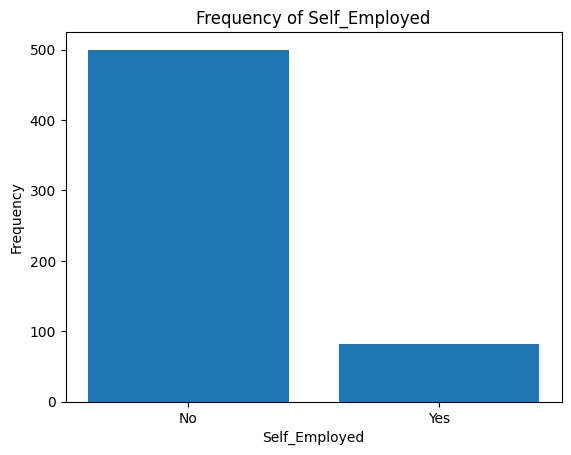

In [46]:

# Count the occurrences of each unique value in the 'Self_Employed' column
value_counts_Self_Employed =df['Self_Employed'].value_counts()
# Plot the frequency
plt.bar(value_counts_Self_Employed.index, value_counts_Self_Employed.values)
plt.xlabel('Self_Employed')
plt.ylabel('Frequency')
plt.title('Frequency of Self_Employed')
plt.show()


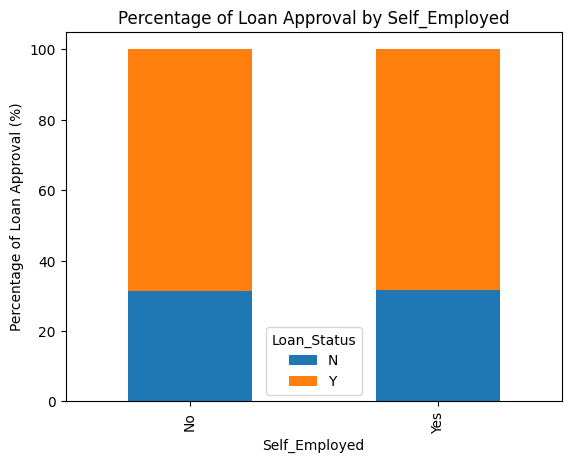

In [53]:
# Calculate the percentage of 'Yes' and 'No' loan approval by credit history
percentage = df.groupby(['Self_Employed', 'Loan_Status']).size() / df.groupby('Self_Employed').size() * 100
percentage = percentage.unstack()

# Plotting
percentage.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Self_Employed')
plt.ylabel('Percentage of Loan Approval (%)')
plt.title('Percentage of Loan Approval by Self_Employed')

# Show the plot
plt.show()

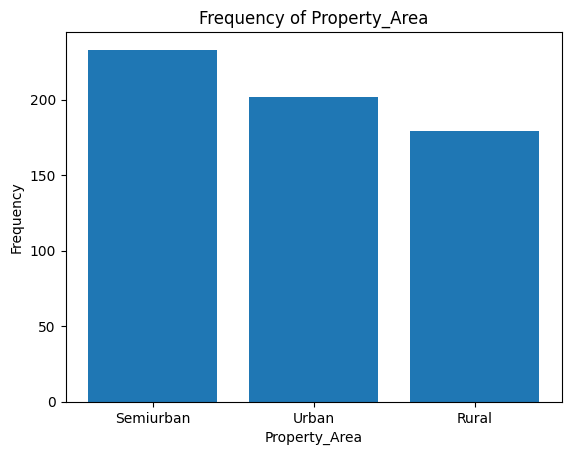

In [52]:
# Count the occurrences of each unique value in the 'Self_Employed' column
value_counts_Self_Employed =df['Property_Area'].value_counts()
# Plot the frequency
plt.bar(value_counts_Self_Employed.index, value_counts_Self_Employed.values)
plt.xlabel('Property_Area')
plt.ylabel('Frequency')
plt.title('Frequency of Property_Area')
plt.show()


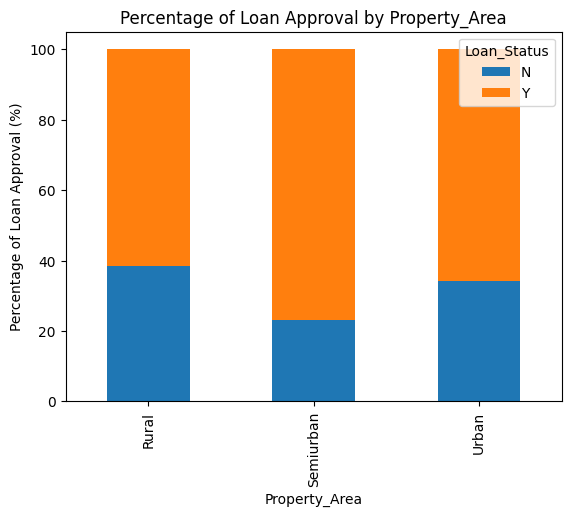

In [54]:
# Calculate the percentage of 'Yes' and 'No' loan approval by credit history
percentage = df.groupby(['Property_Area', 'Loan_Status']).size() / df.groupby('Property_Area').size() * 100
percentage = percentage.unstack()

# Plotting
percentage.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Property_Area')
plt.ylabel('Percentage of Loan Approval (%)')
plt.title('Percentage of Loan Approval by Property_Area')

# Show the plot
plt.show()

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



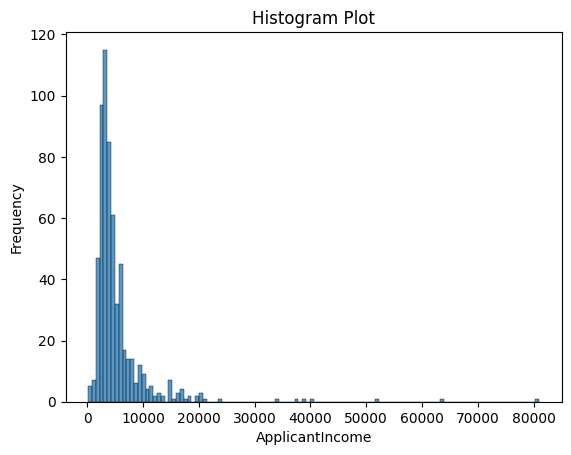

In [47]:
# Plotting the distribution of ApplicantIncome
# Create a histogram plot using seaborn
sns.histplot(df['ApplicantIncome'])

# Set the x-axis label
plt.xlabel('ApplicantIncome')

# Set the y-axis label
plt.ylabel('Frequency')

# Set the title
plt.title('Histogram Plot')

# Display the plot
plt.show()

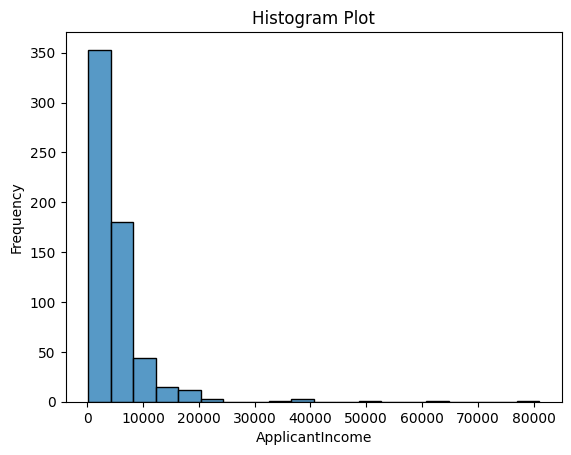

In [48]:
# Plotting the distribution of ApplicantIncome
# Create a histogram plot using seaborn
sns.histplot(df['ApplicantIncome'], bins=20)

# Set the x-axis label
plt.xlabel('ApplicantIncome')

# Set the y-axis label
plt.ylabel('Frequency')

# Set the title
plt.title('Histogram Plot')

# Display the plot
plt.show()

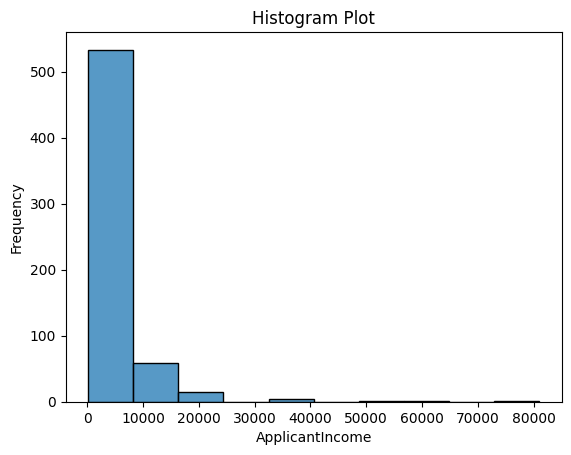

In [49]:
# Plotting the distribution of ApplicantIncome
# Create a histogram plot using seaborn
sns.histplot(df['ApplicantIncome'], bins=10)

# Set the x-axis label
plt.xlabel('ApplicantIncome')

# Set the y-axis label
plt.ylabel('Frequency')

# Set the title
plt.title('Histogram Plot')

# Display the plot
plt.show()

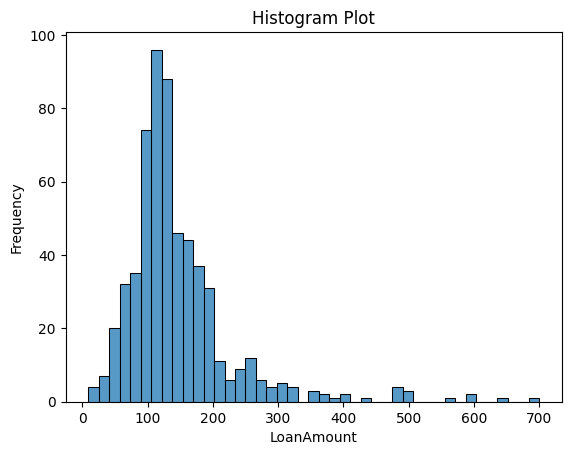

In [50]:
# Plotting the distribution of Loan Amount
# Create a histogram plot using seaborn
sns.histplot(df['LoanAmount'])

# Set the x-axis label
plt.xlabel('LoanAmount')

# Set the y-axis label
plt.ylabel('Frequency')

# Set the title
plt.title('Histogram Plot')

# Display the plot
plt.show()

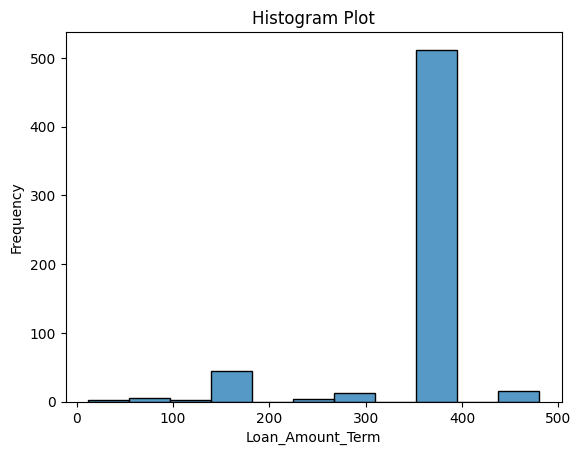

In [51]:
# Plotting the distribution of Loan term
# Create a histogram plot using seaborn
sns.histplot(df['Loan_Amount_Term'])

# Set the x-axis label
plt.xlabel('Loan_Amount_Term')

# Set the y-axis label
plt.ylabel('Frequency')

# Set the title
plt.title('Histogram Plot')

# Display the plot
plt.show()


Look at box plots to understand the distributions. 

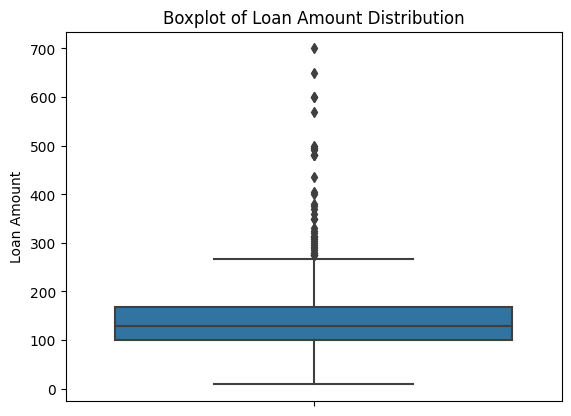

In [55]:
# Loan Amount Distribusion box plot
# Plotting the boxplot
sns.boxplot(y='LoanAmount', data=df)

# Set the y-axis label
plt.ylabel('Loan Amount')

# Set the title
plt.title('Boxplot of Loan Amount Distribution')

# Display the plot
plt.show()

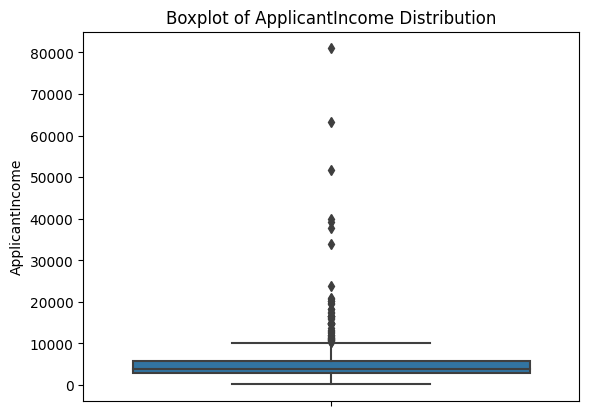

In [57]:
# ApplicantIncome Distribusion box plot
# Plotting the boxplot
sns.boxplot(y='ApplicantIncome', data=df)

# Set the y-axis label
plt.ylabel('ApplicantIncome')

# Set the title
plt.title('Boxplot of ApplicantIncome Distribution')

# Display the plot
plt.show()

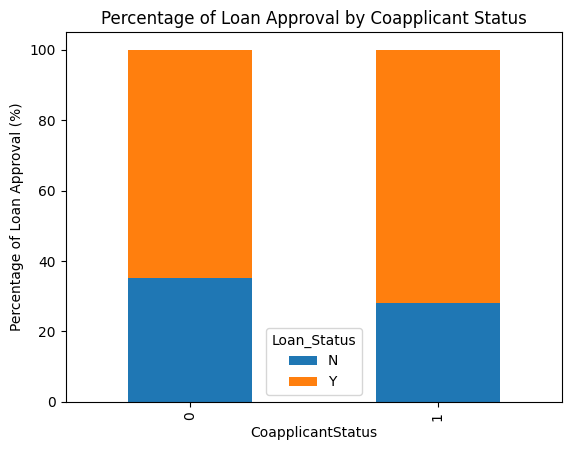

In [83]:
x=df.copy()

# Create 'CoapplicantStatus' column based on the condition
x['CoapplicantStatus'] = x['CoapplicantIncome'].apply(lambda x: 1 if x > 0 else 0)

# Fill NaN values in the 'CoapplicantStatus' column with 0
x['CoapplicantStatus'].fillna(0, inplace=True)

# Calculate the percentage of 'Yes' and 'No' loan approval by 'CoapplicantStatus'
percentage = x.groupby(['CoapplicantStatus', 'Loan_Status']).size() / x.groupby('CoapplicantStatus').size() * 100
percentage = percentage.unstack()

# Plotting
percentage.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('CoapplicantStatus')
plt.ylabel('Percentage of Loan Approval (%)')
plt.title('Percentage of Loan Approval by Coapplicant Status')

# Show the plot
plt.show()

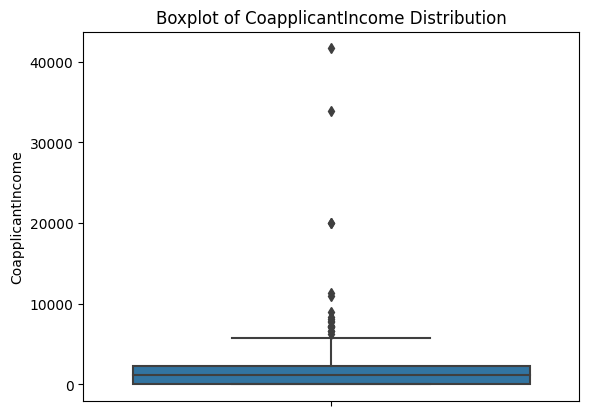

In [58]:
# CoApplicantIncome Distribusion box plot
# Plotting the boxplot
sns.boxplot(y='CoapplicantIncome', data=df)

# Set the y-axis label
plt.ylabel('CoapplicantIncome')

# Set the title
plt.title('Boxplot of CoapplicantIncome Distribution')

# Display the plot
plt.show()

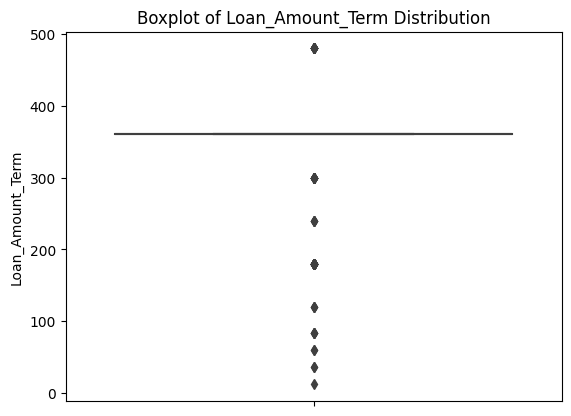

In [59]:
# Loan term Distribusion box plot
# Plotting the boxplot
sns.boxplot(y='Loan_Amount_Term', data=df)

# Set the y-axis label
plt.ylabel('Loan_Amount_Term')

# Set the title
plt.title('Boxplot of Loan_Amount_Term Distribution')

# Display the plot
plt.show()

Loan Amount for Approved Loan insights

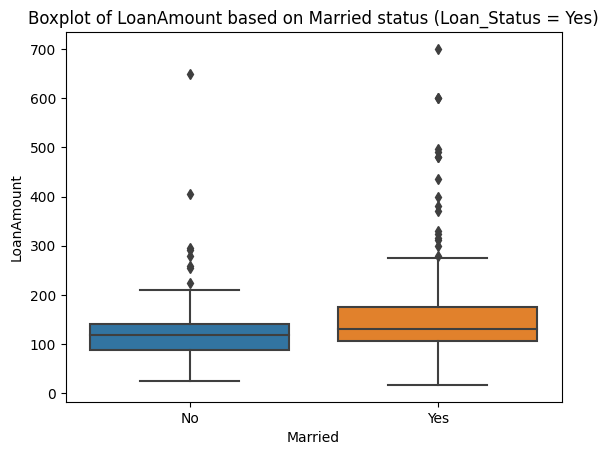

In [43]:
# comparaison LoanAmount based on Married status for those who got approval

# Filter the dataframe for entries with Loan_Status = 'Yes'
filtered_df = df[df['Loan_Status'] == 'Y']

# Plotting the boxplot
sns.boxplot(x='Married', y='LoanAmount', data=filtered_df)

# Set the x-axis label
plt.xlabel('Married')

# Set the y-axis label
plt.ylabel('LoanAmount')

# Set the title
plt.title('Boxplot of LoanAmount based on Married status (Loan_Status = Yes)')

# Display the plot
plt.show()

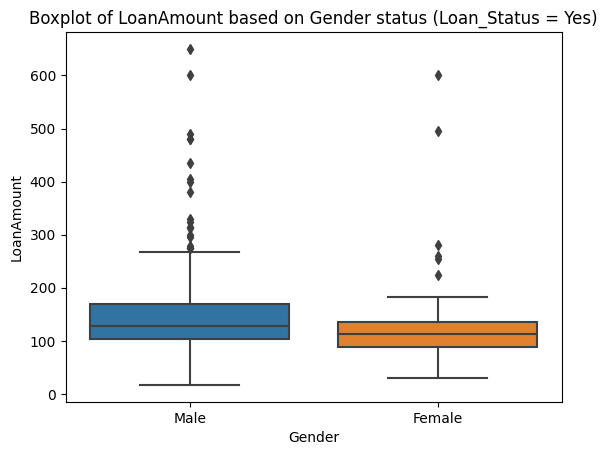

In [44]:
# comparaison LoanAmount based on Married status

# Filter the dataframe for entries with Loan_Status = 'Yes'
filtered_df = df[df['Loan_Status'] == 'Y']

# Plotting the boxplot
sns.boxplot(x='Gender', y='LoanAmount', data=filtered_df)

# Set the x-axis label
plt.xlabel('Gender')

# Set the y-axis label
plt.ylabel('LoanAmount')

# Set the title
plt.title('Boxplot of LoanAmount based on Gender status (Loan_Status = Yes)')

# Display the plot
plt.show()

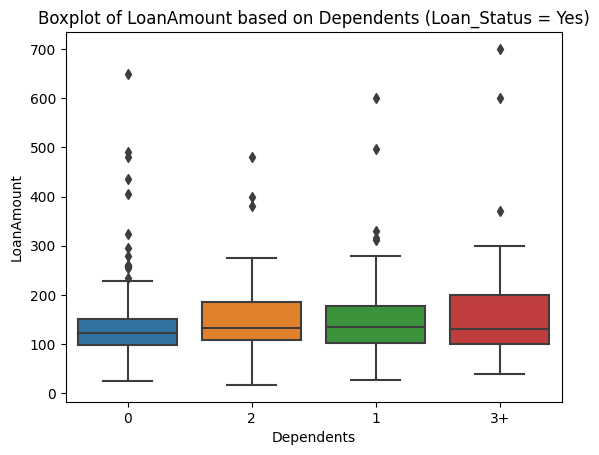

In [45]:
# comparaison LoanAmount based on Dependents status

# Filter the dataframe for entries with Loan_Status = 'Yes'
filtered_df = df[df['Loan_Status'] == 'Y']

# Plotting the boxplot
sns.boxplot(x='Dependents', y='LoanAmount', data=filtered_df)

# Set the x-axis label
plt.xlabel('Dependents')

# Set the y-axis label
plt.ylabel('LoanAmount')

# Set the title
plt.title('Boxplot of LoanAmount based on Dependents (Loan_Status = Yes)')

# Display the plot
plt.show()

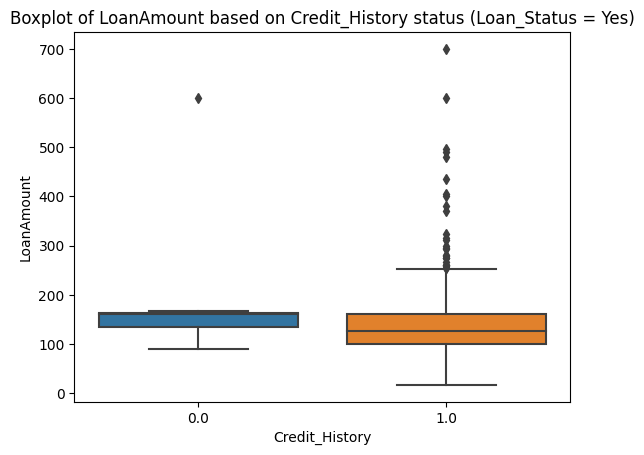

In [46]:
# comparaison LoanAmount based on credit history

# Filter the dataframe for entries with Loan_Status = 'Yes'
filtered_df = df[df['Loan_Status'] == 'Y']

# Plotting the boxplot
sns.boxplot(x='Credit_History', y='LoanAmount', data=filtered_df)

# Set the x-axis label
plt.xlabel('Credit_History')

# Set the y-axis label
plt.ylabel('LoanAmount')

# Set the title
plt.title('Boxplot of LoanAmount based on Credit_History status (Loan_Status = Yes)')

# Display the plot
plt.show()

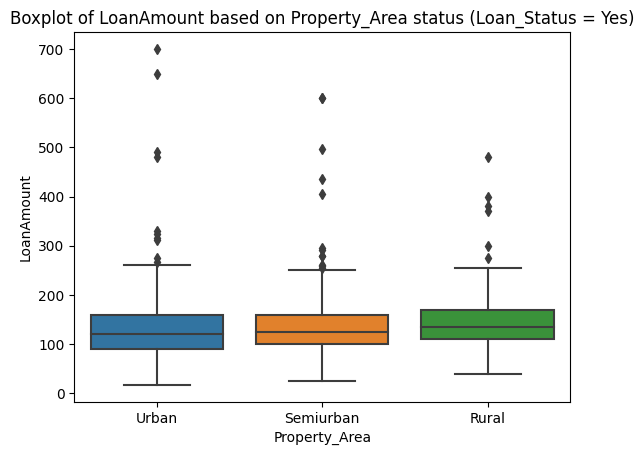

In [47]:
# comparaison LoanAmount based on property area

# Filter the dataframe for entries with Loan_Status = 'Yes'
filtered_df = df[df['Loan_Status'] == 'Y']

# Plotting the boxplot
sns.boxplot(x='Property_Area', y='LoanAmount', data=filtered_df)

# Set the x-axis label
plt.xlabel('Property_Area')

# Set the y-axis label
plt.ylabel('LoanAmount')

# Set the title
plt.title('Boxplot of LoanAmount based on Property_Area status (Loan_Status = Yes)')

# Display the plot
plt.show()

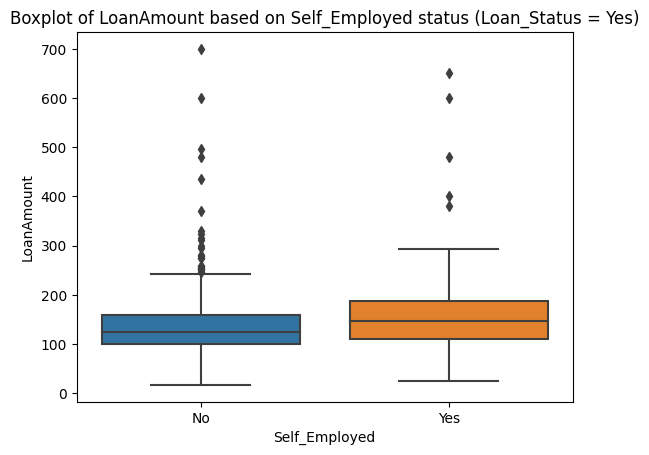

In [48]:
# comparaison LoanAmount based on property area

# Filter the dataframe for entries with Loan_Status = 'Yes'
filtered_df = df[df['Loan_Status'] == 'Y']

# Plotting the boxplot
sns.boxplot(x='Self_Employed', y='LoanAmount', data=filtered_df)

# Set the x-axis label
plt.xlabel('Self_Employed')

# Set the y-axis label
plt.ylabel('LoanAmount')

# Set the title
plt.title('Boxplot of LoanAmount based on Self_Employed status (Loan_Status = Yes)')

# Display the plot
plt.show()

Look at the distribution of income segregated  by `Education`

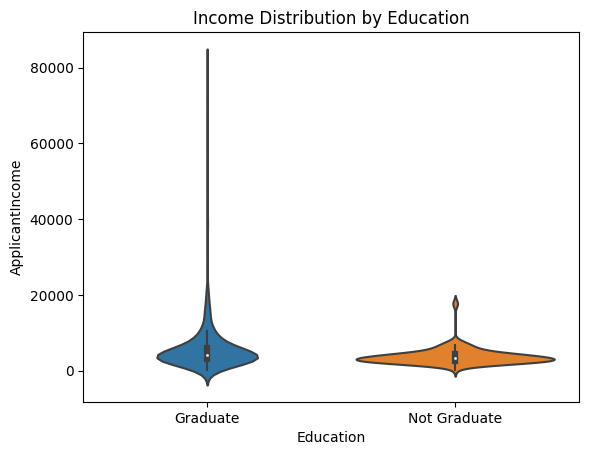

In [56]:
# Create a box plot to visualize income distribution by education
sns.violinplot(data=df, x='Education', y='ApplicantIncome')

# Set the x-axis label
plt.xlabel('Education')

# Set the y-axis label
plt.ylabel('ApplicantIncome')

# Set the title
plt.title('Income Distribution by Education')

# Display the plot
plt.show()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

Education     Graduate  Not Graduate
Gender                              
Female     4646.467391   4629.700000
Male       5992.345745   3630.061947


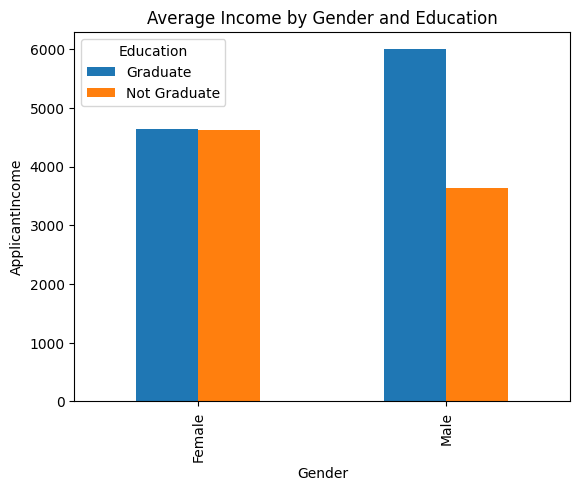

In [58]:
# Generate a pivot table to summarize the data
pivot_table = df.pivot_table(values='ApplicantIncome', index='Gender', columns='Education', aggfunc='mean')

# Display the pivot table
print(pivot_table)

# Create a bar plot to visualize the average income by gender and education
pivot_table.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('ApplicantIncome')
plt.title('Average Income by Gender and Education')
plt.legend(title='Education')
plt.show()


Education    Graduate  Not Graduate
Married                            
No         135.110429    105.279070
Yes        164.323333    125.130952


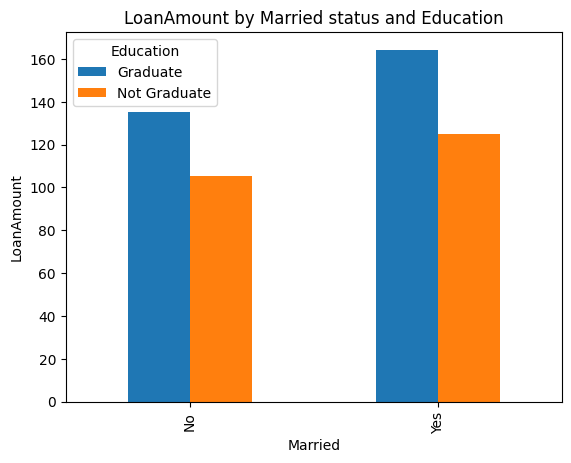

In [59]:
# Generate a pivot table to summarize the data
pivot_table = df.pivot_table(values='LoanAmount', index='Married', columns='Education', aggfunc='mean')

# Display the pivot table
print(pivot_table)

# Create a bar plot to visualize the average income by gender and education
pivot_table.plot(kind='bar')
plt.xlabel('Married')
plt.ylabel('LoanAmount')
plt.title('LoanAmount by Married status and Education')
plt.legend(title='Education')
plt.show()


Credit_History         0.0         1.0
Property_Area                         
Rural           147.846154  155.203008
Semiurban       158.833333  142.950549
Urban           133.172414  137.433566


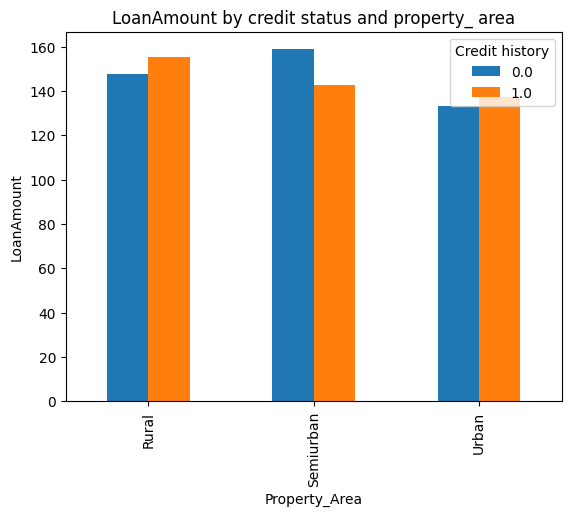

In [47]:
# Generate a pivot table to summarize the data
pivot_table = df.pivot_table(values='LoanAmount', index='Property_Area', columns='Credit_History', aggfunc='mean')

# Display the pivot table
print(pivot_table)

# Create a bar plot to visualize the average income by gender and education
pivot_table.plot(kind='bar')
plt.xlabel('Property_Area')
plt.ylabel('LoanAmount')
plt.title('LoanAmount by credit status and property_ area')
plt.legend(title='Credit history')
plt.show()

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [2]:
import cleaning as cl
# from notebooks.cleaning import missing_value as cl
cl.missing_value(df)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

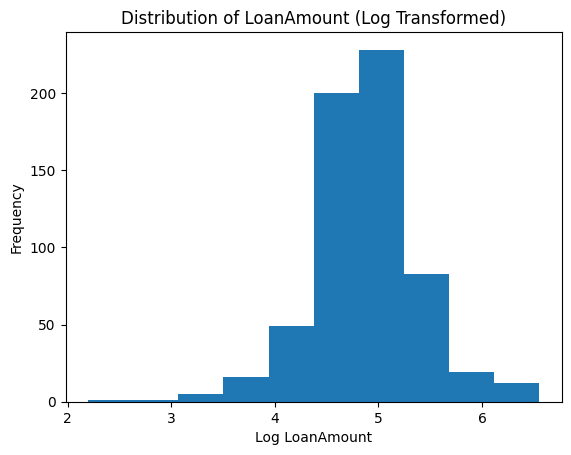

In [64]:
import log_transform as lg
log_lognamount=lg.log_transform(df['LoanAmount'])

# Plot the distribution of "LoanAmount" after the log transformation
plt.hist(log_lognamount)
plt.xlabel('Log LoanAmount')
plt.ylabel('Frequency')
plt.title('Distribution of LoanAmount (Log Transformed)')
plt.show()

Combine both incomes as total income and take a log transformation of the same.

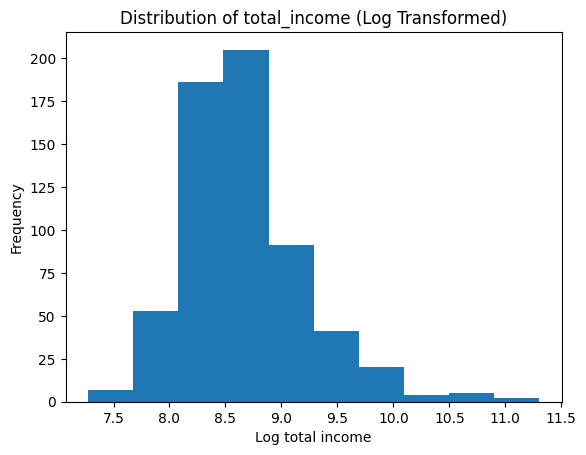

In [65]:
total = df['ApplicantIncome']+ df['CoapplicantIncome']

import log_transform as lg
log_total=lg.log_transform(total)

# Plot the distribution of "LoanAmount" after the log transformation
plt.hist(log_total)
plt.xlabel('Log total income')
plt.ylabel('Frequency')
plt.title('Distribution of total_income (Log Transformed)')
plt.show()

## 4. Building a Predictive Model

In [66]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,200.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# # feature engineering:
# ## family size:
# df['Married'] = df['Married'].replace({'Yes': 1, 'No': 0})
# df['family_size']= 1+df['Dependents'].replace('3+', 3).astype(int)+df['Married']
# df['family_size']= df['family_size'].astype(str)
# df['family_size']= df['family_size'].replace(['4', '5'], '+4')
# df['family_size'].value_counts()
# # ## total income
# df['total_income']=df['ApplicantIncome']+df['CoapplicantIncome']
# df['total_income']=np.log(df['total_income'])
# ## Loanamount
# df['LoanAmount']=np.log(df['LoanAmount'])
# ## Loan_Amount_Term
# df['Loan_Amount_Term']= df['Loan_Amount_Term'].astype(int)
# # ## Credit_History
# df['Credit_History']= df['Credit_History'].astype(str)
# df_eng=df.drop(['Loan_ID','Gender','Married','Dependents','ApplicantIncome','CoapplicantIncome'], axis=1)
# # df_eng.head()
# # from . import features_engineering as fe
import features_engineering as fe
df_eng= fe.features_eng(df)
df_eng.head()

,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,family_size,total_income
0,Graduate,No,5.298317,360,1.0,Urban,Y,1,8.674026
1,Graduate,No,4.852030,360,1.0,Rural,N,3,8.714568
2,Graduate,Yes,4.189655,360,1.0,Urban,Y,2,8.006368
3,Not Graduate,No,4.787492,360,1.0,Urban,Y,2,8.505323
4,Graduate,No,4.948760,360,1.0,Urban,Y,1,8.699515


In [11]:
#modeling with Random Forrest

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X= df_eng.drop('Loan_Status',axis=1)
y= df_eng['Loan_Status']
y= y.replace({'N': 0, 'Y': 1})

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['LoanAmount', 'Loan_Amount_Term', 'total_income']),  # Apply StandardScaler to numerical columns
        ('cat', OneHotEncoder(), ['Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'family_size'])  # Apply OneHotEncoder to categorical columns
    ])

# Fit and transform the data using the preprocessor
transformed_data = preprocessor.fit_transform(X)

# Get the feature names after transformation
feature_names = preprocessor.get_feature_names_out()

# Convert the transformed data to a DataFrame with column labels
transformed_X = pd.DataFrame(transformed_data, columns=feature_names)


#  Split the data
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2, random_state=42,stratify=y)

# # modeling
model = RandomForestClassifier(n_estimators=5)
model.fit(X_train, y_train)

# # Calculate the training accuracy
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# # Calculate the testing accuracy
test_accuracy = model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)



Training Accuracy: 0.955193482688391
Testing Accuracy: 0.7398373983739838


In [70]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVC model
model = SVC()

# Fit the model to the training data
model.fit(X_train, y_train)

# Calculate the training accuracy
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy
test_accuracy = model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.8085539714867617
Testing Accuracy: 0.8536585365853658


In [71]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

# Calculate the training accuracy
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy
test_accuracy = model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.8048780487804879


Try paramater grid search to improve the results

In [72]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the grid search
param_grid = {
    'max_depth': [3, 5, 7, None],  # Define the values to be searched for max_depth
    'n_estimators': [50, 100, 200, 500]  # Define the values to be searched for n_estimators
}

# Create the random forest classifier
model = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Calculate the training accuracy of the best model
train_accuracy = best_model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy of the best model
test_accuracy = best_model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Best Parameters:  {'max_depth': 3, 'n_estimators': 100}
Best Score:  0.7984081632653062
Training Accuracy: 0.7983706720977597
Testing Accuracy: 0.8536585365853658


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Create an SVC model
model_svc = SVC()

# Define the parameter grid for grid search
param_grid = {
    'gamma': [0.1, 1, 10],
    'C': [1, 10, 100]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model_svc, param_grid=param_grid, cv=10)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameter values
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model_svc= grid_search.best_estimator_

# Calculate the training accuracy of the best model
train_accuracy = best_model_svc.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy of the best model
test_accuracy = best_model_svc.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Best Parameters: {'C': 1, 'gamma': 0.1}
Training Accuracy: 0.8004073319755601
Testing Accuracy: 0.8536585365853658


In [ ]:
# Define the parameter grid for the grid search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 500]
}

# Create an instance of the XGBClassifier
model = XGBClassifier()

# Create an instance of GridSearchCV with the XGBClassifier model and parameter grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Perform the grid search on the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Get the best model
best_model_XGB= grid_search.best_estimator_

# Calculate the training accuracy of the best model
train_accuracy = best_model_XGB.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the testing accuracy of the best model
test_accuracy = best_model_XGB.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best Score: 0.7922340266347448
Training Accuracy: 0.8065173116089613
Testing Accuracy: 0.8699186991869918


## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [13]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import cleaning as cl
# from . import cleaning as cl
import features_engineering as fe
# from . import features_engineering as fe
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

#Define the target

X= df.drop('Loan_Status',axis=1)
y= df['Loan_Status']
y= y.replace({'N': 0, 'Y': 1})

#  Split the data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


In [16]:
X_train1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
154,LP001535,Male,No,0,Graduate,No,3254,0.0,50.0,360.0,1.0,Urban
239,LP001792,Male,Yes,1,Graduate,No,3315,0.0,96.0,360.0,1.0,Semiurban
448,LP002443,Male,Yes,2,Graduate,No,3340,1710.0,150.0,360.0,0.0,Rural
471,LP002517,Male,Yes,1,Not Graduate,No,2653,1500.0,113.0,180.0,0.0,Rural
273,LP001894,Male,Yes,0,Graduate,No,2620,2223.0,150.0,360.0,1.0,Semiurban


Best test set accuracy: 0.7967479674796748
Achieved with hyperparameters: {'classifier__max_depth': 3, 'classifier__n_estimators': 200}
Training Accuracy: 0.7637474541751528
Testing Accuracy: 0.7967479674796748
Classification Report (Default Threshold):
              precision    recall  f1-score   support

           0       0.72      0.55      0.63        38
           1       0.82      0.91      0.86        85

    accuracy                           0.80       123
   macro avg       0.77      0.73      0.74       123
weighted avg       0.79      0.80      0.79       123



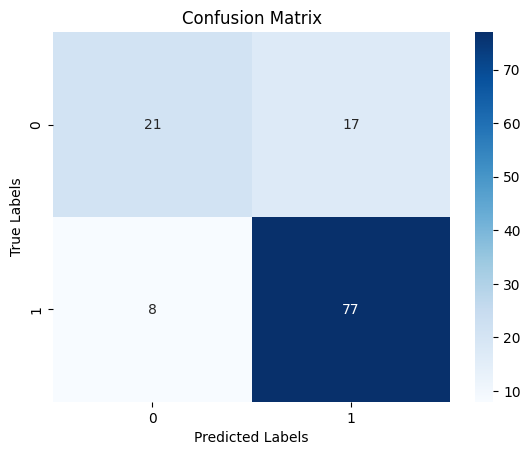

In [4]:

# Define the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['LoanAmount', 'Loan_Amount_Term', 'total_income']),  # Apply StandardScaler to numerical columns
        ('cat', OneHotEncoder(), ['Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'family_size'])  # Apply OneHotEncoder to categorical columns
    ])
cleaning_object = FunctionTransformer(cl.missing_value)

features_engineering_object = FunctionTransformer(fe.features_eng)


pipeline = Pipeline(steps=[('df_clean', cleaning_object),('df_eng',features_engineering_object),('df_trans',preprocessor),('classifier',RandomForestClassifier())])


# Find the best hyperparameters using GridSearchCV on the train set
param_grid = {'classifier__max_depth': [3, 5, 7, None], 
              'classifier__n_estimators': [50, 100, 200, 500],
              }
grid = GridSearchCV(pipeline, param_grid=param_grid, cv=10)
grid.fit(X_train1, y_train1)

best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(X_test1, y_test1)
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')


# # Calculate the training accuracy
train_accuracy = best_model.score(X_train1, y_train1)
print("Training Accuracy:", train_accuracy)

# # Calculate the testing accuracy
test_accuracy = best_model.score(X_test1, y_test1)
print("Testing Accuracy:", test_accuracy)


# Make predictions on the testing data
y_pred1 = best_model.predict(X_test1)
#Classification Report
print("Classification Report (Default Threshold):")
print(classification_report(y_test1, y_pred1))
# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test1, y_pred1)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [31]:

grid

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('df_clean',
                                        FunctionTransformer(func=<function missing_value at 0x000001883A76AC10>)),
                                       ('df_eng',
                                        FunctionTransformer(func=<function features_eng at 0x000001883FC0AAF0>)),
                                       ('df_trans',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['LoanAmount',
                                                                          'Loan_Amount_Term',
                                                                          'total_income']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Education',
                                                                          'Self_Employed',
                                                                          'Credit_History',
                                                                          'Property_Area',
                                                                          'family_size'])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [3, 5, 7, None],
                         'classifier__n_estimators': [50, 100, 200, 500]})

In [5]:
#Saving the model


import pickle

# Save the model
pickle.dump(grid, open('model.p', 'wb'))
pickle.dump(X.columns, open('columns.p', 'wb'))

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [69]:
# testing app1 step by step using local machine


json_=[
    {
    "Loan_ID" : "LP001002",
    "Gender" : "Male",
    "Married" : "No",
    "Dependents" : "0",
    "Education" : "Graduate",
    "Self_Employed" : "No",
    "ApplicantIncome" : 5849,
    "CoapplicantIncome" : 200,
    "LoanAmount" : 1.0,
    "Loan_Amount_Term" : 360.0,
    "Credit_History" : 1.0,
    "Property_Area" : "Urban"
       }
]

In [7]:
print(json_)

[{'Loan_ID': 'LP001002', 'Gender': 'Male', 'Married': 'No', 'Dependents': '0', 'Education': 'Graduate', 'Self_Employed': 'No', 'ApplicantIncome': 5849, 'CoapplicantIncome': 200, 'LoanAmount': 1.0, 'Loan_Amount_Term': 360.0, 'Credit_History': 1.0, 'Property_Area': 'Urban'}]


In [8]:
query = pd.DataFrame(json_)
query

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,200,1.0,360.0,1.0,Urban


In [9]:
model_columns= X.columns
print(model_columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [10]:
query = query.reindex(columns = model_columns, fill_value= 0)
query

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,200,1.0,360.0,1.0,Urban


In [11]:
grid.predict(query)

array([1], dtype=int64)